# 다중회귀 - 보스톤 주택 가격 

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns=boston. feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 산점도와 선형회귀선

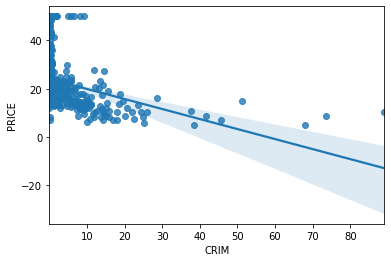

In [6]:
sns.regplot (x='CRIM', y='PRICE', data=df)
plt.show() 

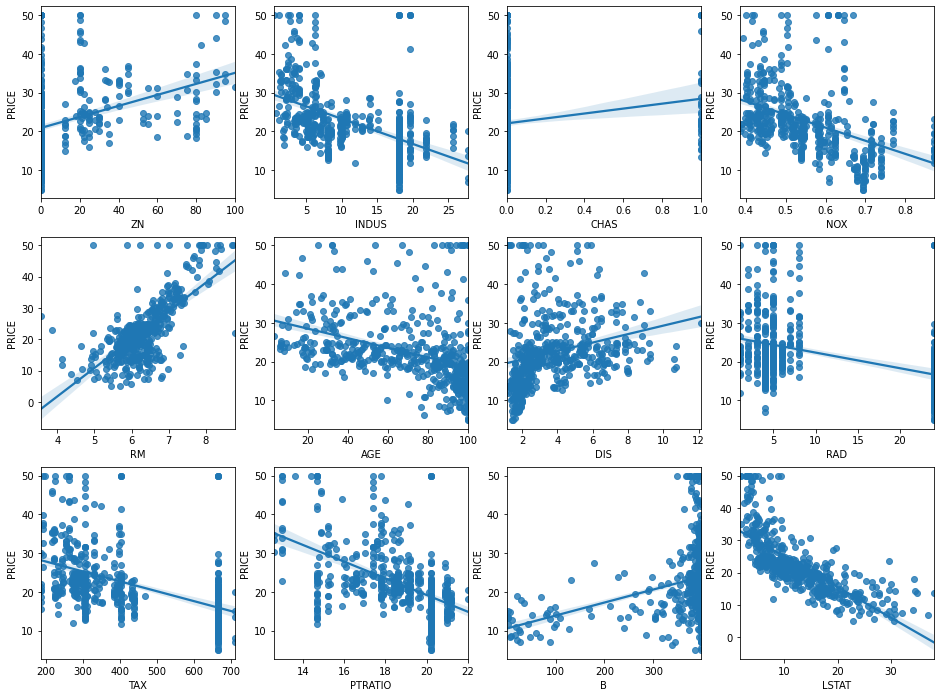

In [9]:
_, axs = plt.subplots(nrows=3, ncols=4, figsize=(16,12))
for i, feature in enumerate(df.columns[1:-1]):  # for문으로 data 받아오기 
    row, col = i//4, i%4
    sns.regplot(x=feature, y='PRICE', data=df, ax=axs[row][col])


- feature 별 R squred value

In [10]:
from sklearn.linear_model import LinearRegression

In [12]:
# CRIM
X = df.CRIM.values.reshape(-1,1)
y = boston.target
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.15078046904975717

In [15]:
y = boston.target
for feature in df.columns[:-1]:   # y값 빼고
    X = df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,y)
    lr.score(X,y)
    print(f'{feature}:\t{score:.4f}')

NameError: name 'score' is not defined

- 다중 선형회귀

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2021
)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [18]:
# 잔처리를 잘 할 수 있는지 없는지
# 다중선혀회귀에서는 R squqred value가 무의미

lr.score(X_test, y_test)

0.6948217410258365

In [19]:
# weight
lr.coef_

array([-1.10500227e-01,  5.26278094e-02,  9.51758224e-03,  3.13787206e+00,
       -1.80816721e+01,  3.76906339e+00,  9.62954788e-03, -1.47634409e+00,
        3.19031892e-01, -1.19276281e-02, -8.98574354e-01,  9.05059107e-03,
       -5.53828184e-01])

In [20]:
# Bias
lr.intercept_

35.503661681753684

- 회귀식
```<br>
PRICE = -0.11 * CRIM + 0.053 * ZN + ... -0.55 * LSTAT + 35.5
```

- 테스트 데이터

In [21]:
X_test[0], y_test[0]

(array([1.7446e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
        5.9600e+00, 9.2100e+01, 3.8771e+00, 4.0000e+00, 2.7700e+02,
        1.8600e+01, 3.9325e+02, 1.7270e+01]),
 21.7)

In [24]:
# Wieght와 Bias로 구한 예측값
np.dot(X_test[0], lr.coef_) + lr.intercept_

22.760898673619927

In [26]:
# predict로 예측한 값
lr.predict(X_test[:1])

array([22.76089867])

In [31]:
# 10개이 데이터에 대한 예측값과 실제값
for i in range(10):
    pred1 = np.dot(X_test[i], lr.coef_) + lr.intercept_  # y = w(lr.coef)x(np.dot) + b(lr.intercept_)
    # pred2 = lr.predict(X_test[i].reshape(1,-1)) # 이렇게 말고 밑에처럼도 됨. 이건 numpy식 코드
    # pred2 = lr.predict([X_test[i]]) # reshape 사용 안하고 하기
    pred2 = lr.predict([X_test[i]])   
    print(f'실제값: {y_test[i]}, 예측값1 : {pred1:.2f}, 예측값2: {pred2[0]:.2f}')

실제값: 21.7, 예측값1 : 22.76, 예측값2: 22.76
실제값: 15.6, 예측값1 : 15.79, 예측값2: 15.79
실제값: 20.0, 예측값1 : 22.26, 예측값2: 22.26
실제값: 12.8, 예측값1 : 13.17, 예측값2: 13.17
실제값: 50.0, 예측값1 : 36.79, 예측값2: 36.79
실제값: 20.6, 예측값1 : 19.43, 예측값2: 19.43
실제값: 22.6, 예측값1 : 27.04, 예측값2: 27.04
실제값: 24.1, 예측값1 : 29.42, 예측값2: 29.42
실제값: 24.4, 예측값1 : 23.64, 예측값2: 23.64
실제값: 36.1, 예측값1 : 33.23, 예측값2: 33.23


In [28]:
X_test[0]

array([1.7446e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
       5.9600e+00, 9.2100e+01, 3.8771e+00, 4.0000e+00, 2.7700e+02,
       1.8600e+01, 3.9325e+02, 1.7270e+01])

In [29]:
X_test[:1]

array([[1.7446e-01, 0.0000e+00, 1.0590e+01, 1.0000e+00, 4.8900e-01,
        5.9600e+00, 9.2100e+01, 3.8771e+00, 4.0000e+00, 2.7700e+02,
        1.8600e+01, 3.9325e+02, 1.7270e+01]])